### Student Information
Name: 林貝芸 Lin,Pei-Yun

Student ID: 113086852

GitHub ID: u105500014-wq

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [125]:
### Begin Assignment Here 
#讀出資料
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
df


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [126]:
#挑三個我覺得比較相關的欄位
df = df[["text", "sentiment", "label"]].copy()

#加上三種情緒的文字標籤
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}
df["category"] = df["label"]
df["category_name"] = df["label"].map(label_map)

#看前幾筆資料
df.head()


,text,sentiment,label,category,category_name
0,Calls on retards,-1.0,-1.0,-1.0,negative
1,Stunt as in like why did they even make a big ...,1.0,0.0,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,0.0,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,1.0,positive
4,He didn’t say thank you.,0.0,-1.0,-1.0,negative


In [127]:
#確認總筆數跟上面一樣是847
print("Number of records:", len(df))

#了解label分布
print(df["category_name"].value_counts())

#隨機挑幾筆看有沒有問題
print(df.sample(6, random_state=42))


Number of records: 847
category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64
                                                  text  sentiment  label  \
457                                          "We" who?        0.0    0.0   
342                                     Chicken jockey       -1.0    0.0   
280                                      Not great Bob        1.0   -1.0   
275  Speak for yourself, my wife is being harder on...        1.0    0.0   
843                             Where can I read this?        0.0    0.0   
734                       That's a chart since April 6        0.0    0.0   

     category category_name  
457       0.0       neutral  
342       0.0       neutral  
280      -1.0      negative  
275       0.0       neutral  
843       0.0       neutral  
734       0.0       neutral  


In [128]:
#檢查有無缺漏項目
print(df.isnull().sum())

#清理缺text的列
df = df.dropna(subset=["text"])


text             0
sentiment        0
label            0
category         0
category_name    0
dtype: int64


In [129]:
#把文字資料轉換成數字矩陣,電腦才可理解
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english")
X_counts = count_vect.fit_transform(df["text"])

print("Shape of term-document matrix:", X_counts.shape)


Shape of term-document matrix: (847, 4105)


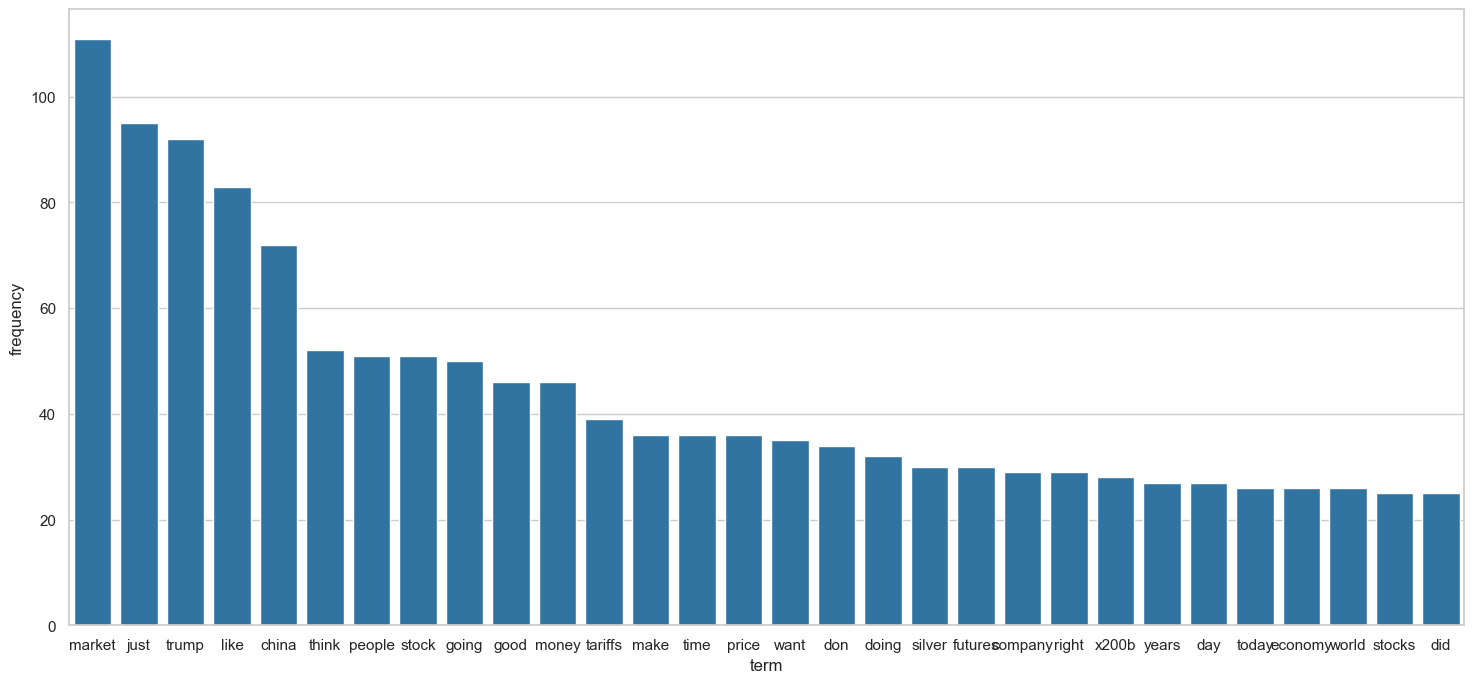

In [130]:
#詞彙出現頻率計算
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#將其排序
terms = count_vect.get_feature_names_out()
df_terms = pd.DataFrame({"term": terms, "frequency": term_frequencies})
df_terms = df_terms.sort_values(by="frequency", ascending=False)

#選"前30"常出現的詞彙畫成圖表
plt.figure(figsize=(18,8))
sns.barplot(x="term", y="frequency", data=df_terms.head(30))
plt.xticks(rotation=0)
plt.show()


In [131]:
#用plotly呈現
fig = px.bar(df_terms.head(30), x="term", y="frequency", 
             title="Top 30 Terms")
fig.show()

#log減少差異
import math
df_terms["frequency_log"] = df_terms["frequency"].apply(lambda x: math.log(x+1))


fig = px.bar(df_terms.head(30), x="term", y="frequency_log",
             title="Top 30 Terms")
fig.show()


## 視覺化圖形

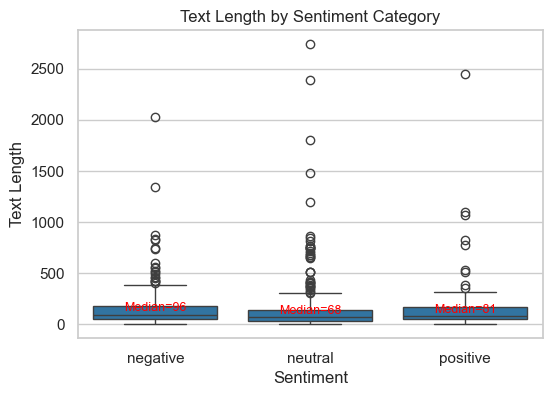

In [132]:
#文字長度看來在情緒的辨識上沒有太大的差異

#建立文字長度欄位
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.boxplot(x="category_name", y="text_length", data=df)
plt.title("Text Length by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")

#在圖上標註中位數
medians = df.groupby("category_name")["text_length"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 2, f"Median={int(median)}", 
             ha='center', va='bottom', fontsize=9, color="red")

plt.show()


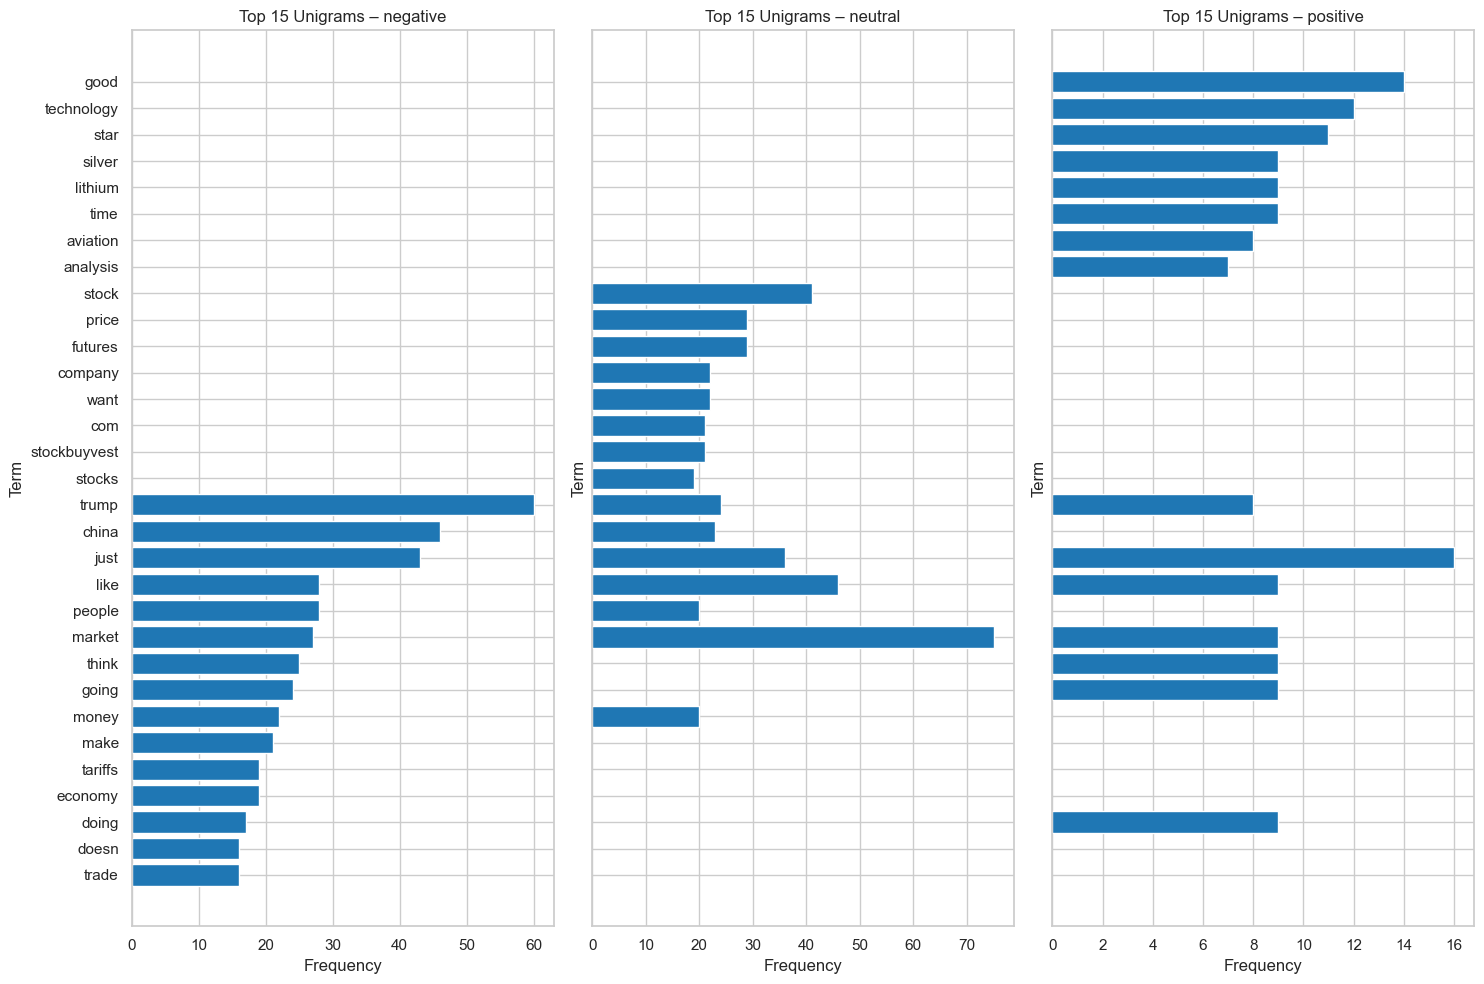

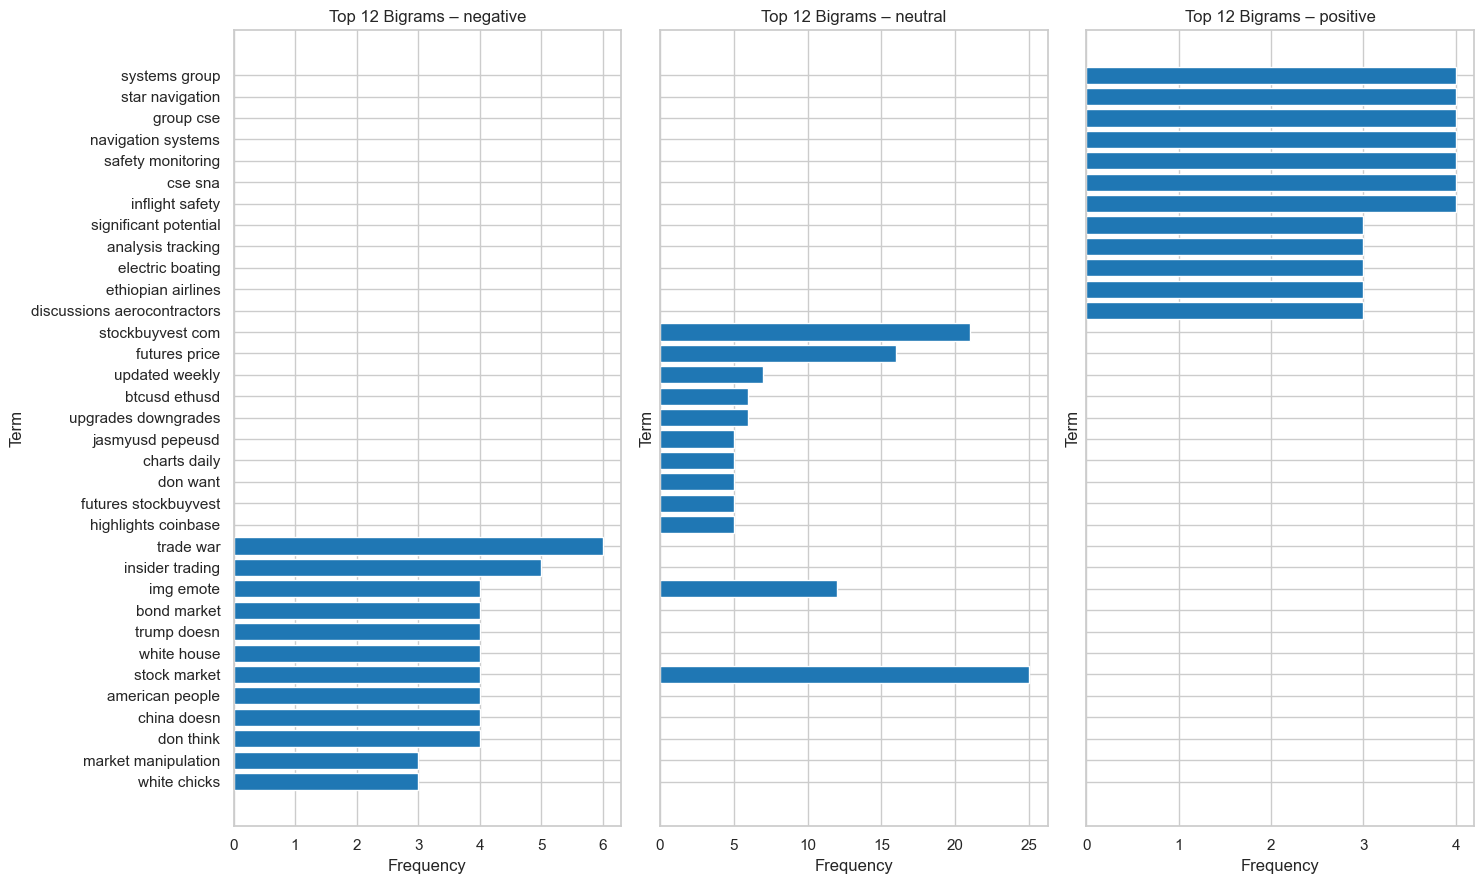

In [133]:
#一開始我用文字長度來比較不同情緒的差異，但結果看不出明顯差別。
#單純統計字數並不能解釋情緒上的不同，所以我改從詞彙的角度來觀察，把文字斷詞後，
#分別挑出正向、中立、負向三種情緒中最常出現的單字和雙詞組合。
#這樣能更清楚看出哪些詞跟不同情緒比較有關，也比單純字數的比較更有意義。


#確保有category_name
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}
if "category_name" not in df.columns:
    df["category"] = df["label"]
    df["category_name"] = df["label"].map(label_map)

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style("whitegrid")


#抓Top-N單詞或雙詞
def top_ngrams_for_class(frame, label_col, label_value, text_col="text",
                         ngram_range=(1,1), topn=15):
    sub = frame[frame[label_col] == label_value]
    vect = CountVectorizer(stop_words="english", ngram_range=ngram_range,
                           token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b")  # 只保留至少兩個字母的詞
    Xc = vect.fit_transform(sub[text_col].astype(str))
    freqs = np.asarray(Xc.sum(axis=0)).ravel()
    terms = vect.get_feature_names_out()
    out = pd.DataFrame({"term": terms, "freq": freqs}).sort_values("freq", ascending=False).head(topn)
    return out

#圖Ａ：每個情緒的Top-15單字
topn = 15
cats = ["negative", "neutral", "positive"]
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
for ax, c in zip(axes, cats):
    top_uni = top_ngrams_for_class(df, "category_name", c, ngram_range=(1,1), topn=topn)
    ax.barh(top_uni["term"][::-1], top_uni["freq"][::-1])
    ax.set_title(f"Top {topn} Unigrams – {c}")
    ax.set_xlabel("Frequency"); ax.set_ylabel("Term")
plt.tight_layout(); plt.show()

#圖B：每個情緒的Top-15雙詞(雙詞＝兩個單字組合而成)
topn_bi = 12
fig, axes = plt.subplots(1, 3, figsize=(15, 9), sharey=True)
for ax, c in zip(axes, cats):
    top_bi = top_ngrams_for_class(df, "category_name", c, ngram_range=(2,2), topn=topn_bi)
    ax.barh(top_bi["term"][::-1], top_bi["freq"][::-1])
    ax.set_title(f"Top {topn_bi} Bigrams – {c}")
    ax.set_xlabel("Frequency"); ax.set_ylabel("Term")
plt.tight_layout(); plt.show()


#這樣就可以清楚地看出三種情緒的各跟哪些語詞有關，幫助我們理解電腦是靠這些詞來判斷情緒的。


# Phase 2

In [145]:
# ---------- 0) Imports & Global Config ----------
import re, math, numpy as np, pandas as pd
from collections import Counter
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, Binarizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")

# NLTK 停用詞（環境沒有也不影響執行）
try:
    import nltk
    nltk.download('stopwords', quiet=True)
    from nltk.corpus import stopwords
    STOPWORDS = set(stopwords.words('english'))
except Exception:
    STOPWORDS = set()

RSEED = 42
np.random.seed(RSEED)

print("[INFO] Libraries imported.")


# ---------- 1) Load Data ----------
# 說明：
# - 只取 text / label，並建立字串標籤便於觀察
DATA_PATH = "/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)
df = df[['text', 'label']].dropna()
label_map = {-1.0:'negative', 0.0:'neutral', 1.0:'positive'}
df['category_name'] = df['label'].map(label_map)

print("[INFO] Data loaded:", df.shape)
print(df['category_name'].value_counts())

[INFO] Libraries imported.
[INFO] Data loaded: (847, 3)
category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


In [135]:
# ---------- 2) Baseline：BoW / TF-IDF + Naive Bayes ----------
# 說明：
# - 先建立可重現的 baseline
# - BoW+MultinomialNB 通常在短文本表現穩定；TF-IDF+ComplementNB 為常見對照

train_text, test_text, y_train, y_test = train_test_split(
    df['text'].astype(str), df['category_name'],
    test_size=0.3, random_state=RSEED, stratify=df['category_name']
)

# 2.1 CountVectorizer + MultinomialNB
bow = CountVectorizer(stop_words='english', token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b")
Xtr_bow = bow.fit_transform(train_text)
Xte_bow = bow.transform(test_text)
nb_bow = MultinomialNB().fit(Xtr_bow, y_train)
pred_bow = nb_bow.predict(Xte_bow)
acc_bow = accuracy_score(y_test, pred_bow)
print("\n[Baseline] Count + MultinomialNB  Accuracy:", acc_bow)
print(classification_report(y_test, pred_bow, digits=4))

# 2.2 TF-IDF + ComplementNB
tfidf = TfidfVectorizer(stop_words='english', token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
                        sublinear_tf=True)
Xtr_tfidf = tfidf.fit_transform(train_text)
Xte_tfidf = tfidf.transform(test_text)
nb_tfidf = ComplementNB().fit(Xtr_tfidf, y_train)
pred_tfidf = nb_tfidf.predict(Xte_tfidf)
acc_tfidf = accuracy_score(y_test, pred_tfidf)
print("\n[Baseline] TF-IDF + ComplementNB Accuracy:", acc_tfidf)
print(classification_report(y_test, pred_tfidf, digits=4))


[Baseline] Count + MultinomialNB  Accuracy: 0.5647058823529412
              precision    recall  f1-score   support

    negative     0.5207    0.6632    0.5833        95
     neutral     0.6231    0.6378    0.6304       127
    positive     0.0000    0.0000    0.0000        33

    accuracy                         0.5647       255
   macro avg     0.3812    0.4337    0.4046       255
weighted avg     0.5043    0.5647    0.5313       255


[Baseline] TF-IDF + ComplementNB Accuracy: 0.49019607843137253
              precision    recall  f1-score   support

    negative     0.4853    0.6947    0.5714        95
     neutral     0.6000    0.4488    0.5135       127
    positive     0.0833    0.0606    0.0702        33

    accuracy                         0.4902       255
   macro avg     0.3895    0.4014    0.3850       255
weighted avg     0.4904    0.4902    0.4777       255



In [136]:
# ---------- 3) Frequent Pattern Mining：Plan A（FP-Growth） ----------
# 說明：
# - 以「每篇文件=交易、單字=items」建 transactions
# - Reddit 短文本常見：以一般門檻找不到長度≥2之樣式（低共現）
def clean_tokens(text: str):
    toks = re.findall(r"[a-z]{2,}", str(text).lower())
    if STOPWORDS:
        toks = [t for t in toks if t not in STOPWORDS]
    return toks

df['tokens'] = df['text'].astype(str).apply(clean_tokens)
transactions = [list(set(toks)) for toks in df['tokens'] if toks]  # 文件級去重
print(f"\n[FPM] 有效 transactions：{len(transactions)}")

pairs_plus = {}
try:
    from PAMI.frequentPattern.basic.FPGrowth import FPGrowth
    min_support_abs = 2  # 至少出現在 2 篇文件
    fp = FPGrowth(transactions, min_support_abs)
    fp.mine()
    freq_patterns = fp.getPatterns()
    pairs_plus = {items: sup for items, sup in freq_patterns.items() if len(items) >= 2}
    print("[FPM] FP-Growth 長度≥2 的樣式數：", len(pairs_plus))
    if pairs_plus:
        top10 = sorted(pairs_plus.items(), key=lambda kv: kv[1], reverse=True)[:10]
        print("[FPM] Top-10 pairs:", top10)
    else:
        print("[FPM] 以本門檻在短文本中未擷取到 pairs（常見情況）。")
except Exception as e:
    print("[FPM] 跳過（環境無 PAMI 或執行失敗）：", e)


[FPM] 有效 transactions：838
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
[FPM] FP-Growth 長度≥2 的樣式數： 0
[FPM] 以本門檻在短文本中未擷取到 pairs（常見情況）。


In [137]:
# FP-Growth結果：長度 ≥ 2 的詞組 = 0，沒有找到。
# 推測可能原因：Reddit 留言大多很短；同一對詞在不同文章裡一起出現的次數很少，所以達不到門檻。

# ---------- 4) Frequent Pattern Mining：Plan B（PMI bigram） ----------
# 說明：
# - 若 FP-Growth 较難擷取樣式，改以「bigram 的文件頻率 + PMI」挑高關聯詞雙
# - 取 Top-K 轉為 0/1 二值樣式，作為「擴增特徵」

def to_bigrams(tokens):
    return list(zip(tokens, tokens[1:]))

doc_bigrams = [set(to_bigrams(toks)) for toks in df["tokens"]]

bigram_df_counter = Counter()
for s in doc_bigrams:
    bigram_df_counter.update(s)

MIN_DF = 3  # 2~5 常見；視資料調整
candidate_patterns = [(bg, c) for bg, c in bigram_df_counter.items() if c >= MIN_DF]
candidate_patterns.sort(key=lambda x: x[1], reverse=True)
print(f"\n[PMI] 候選 bigram（DF≥{MIN_DF}）數量：{len(candidate_patterns)}")
print("[PMI] Top-10 by DF:", candidate_patterns[:10])

N_docs = len(df)
unigram_df_counter = Counter()
for toks in df["tokens"]:
    unigram_df_counter.update(set(toks))

def p_word(w):
    return unigram_df_counter[w] / N_docs if unigram_df_counter[w] > 0 else 1e-12

def p_bigram(bg):
    return bigram_df_counter[bg] / N_docs if bigram_df_counter[bg] > 0 else 1e-12

def pmi(bg):
    (w1, w2) = bg
    return math.log2( p_bigram(bg) / (p_word(w1) * p_word(w2)) )

scored = []
for bg, c in candidate_patterns:
    try:
        scored.append((bg, c, pmi(bg)))
    except ZeroDivisionError:
        pass

scored_sorted = sorted(scored, key=lambda x: (x[2], x[1]), reverse=True)
print("[PMI] Top-10 by PMI:", scored_sorted[:10])

K = 100  # 之前的設定；可依需要 50/100/200 調整
topK_patterns = [bg for (bg, dfc, pmi_v) in scored_sorted[:K]]
pattern_cols = [f"pat::{a}_{b}" for (a, b) in topK_patterns]

pattern_mat = np.zeros((len(doc_bigrams), len(topK_patterns)), dtype=int)
pair_index = {pair: i for i, pair in enumerate(topK_patterns)}
for i, s in enumerate(doc_bigrams):
    for pair, j in pair_index.items():
        if pair in s:
            pattern_mat[i, j] = 1

pattern_df = pd.DataFrame(pattern_mat, columns=pattern_cols, index=df.index)
print("[PMI] pattern_df 形狀：", pattern_df.shape)


[PMI] 候選 bigram（DF≥3）數量：143
[PMI] Top-10 by DF: [(('stockbuyvest', 'com'), 21), (('emote', 'th'), 12), (('img', 'emote'), 12), (('stock', 'market'), 12), (('bond', 'market'), 7), (('updated', 'weekly'), 7), (('trade', 'war'), 6), (('long', 'term'), 6), (('looks', 'like'), 6), (('btcusd', 'ethusd'), 6)]
[PMI] Top-10 by PMI: [(('liz', 'truss'), 3, 8.141255658611042), (('supreme', 'court'), 3, 8.141255658611042), (('pessimism', 'suggest'), 4, 7.726218159332198), (('depends', 'various'), 4, 7.726218159332198), (('various', 'factors'), 4, 7.726218159332198), (('indicates', 'optimism'), 4, 7.726218159332198), (('generally', 'indicates'), 4, 7.726218159332198), (('finra', 'ats'), 4, 7.726218159332198), (('analyst', 'recommendations'), 3, 7.726218159332198), (('upgrades', 'downgrades'), 3, 7.726218159332198)]
[PMI] pattern_df 形狀： (847, 100)


In [138]:
# ---------- 5) Augment：與 TDM/TF-IDF 合併 ----------
count_vect_all = CountVectorizer(min_df=2, stop_words='english')
X_tdm_all = count_vect_all.fit_transform(df['text'].astype(str))
tdm_df = pd.DataFrame(X_tdm_all.toarray(),
                      columns=count_vect_all.get_feature_names_out(), index=df.index)

tfidf_vect_all = TfidfVectorizer(min_df=2, stop_words='english', sublinear_tf=True)
X_tfidf_all = tfidf_vect_all.fit_transform(df['text'].astype(str))
tfidf_df = pd.DataFrame(X_tfidf_all.toarray(),
                        columns=tfidf_vect_all.get_feature_names_out(), index=df.index)

aug_tdm_df   = pd.concat([tdm_df,   pattern_df], axis=1)
aug_tfidf_df = pd.concat([tfidf_df, pattern_df], axis=1)
print("[AUG] aug_tdm_df, aug_tfidf_df：", aug_tdm_df.shape, aug_tfidf_df.shape)

[AUG] aug_tdm_df, aug_tfidf_df： (847, 1592) (847, 1592)


/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



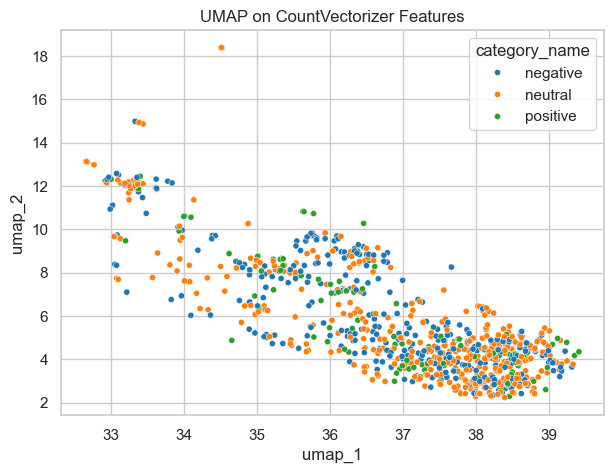

In [139]:
# ---------- 5.5 UMAP降維視覺化----------
# 說明：
# - 將高維詞袋降到 2D，觀察三類分布
# 結果：顏色代表標籤（橘：neutral、藍：negative、綠：positive）。
#      看到三色點大範圍重疊，只是一條鬆散的帶狀分布。
#      如果 2D 上本來就很難分開，分類器要在原高維空間完全分開機率也不高（除非換表示法/特徵很強）。
#      顯示此資料本質不好分。
try:
    import umap
    reducer = umap.UMAP(n_components=2, random_state=RSEED)
    X_umap = reducer.fit_transform(X_tdm_all)
    df['umap_1'], df['umap_2'] = X_umap[:, 0], X_umap[:, 1]
    fig, ax = plt.subplots(figsize=(7,5))
    sns.scatterplot(data=df, x='umap_1', y='umap_2', hue='category_name', s=20, ax=ax)
    ax.set_title("UMAP on CountVectorizer Features")
    plt.show()
except Exception as e:
    print("[UMAP] 跳過（環境無 umap-learn 或執行失敗）：", e)

In [140]:
# ---------- 5.6 Discretization & Binarization ----------
# 說明：
# - 將 text_length 做三等分與二值化，示範數值特徵處理
df["text_length"] = df["text"].astype(str).apply(len)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['text_length_discrete'] = discretizer.fit_transform(df[['text_length']])
median_length = df['text_length'].median()
binarizer = Binarizer(threshold=median_length)
df['text_length_binary'] = binarizer.fit_transform(df[['text_length']])
print(df[['text_length','text_length_discrete','text_length_binary']].head())

   text_length  text_length_discrete  text_length_binary
0           16                   0.0                   0
1          137                   0.0                   1
2           33                   0.0                   0
3         1067                   1.0                   1
4           24                   0.0                   0


In [141]:
# ---------- 5.7 Classification：四組對照 ----------
# 說明：
# - 以「模型×特徵」四組對照，並印出報表
y_num = df['label']

def eval_nb(X, y, name, use_cnb=False):
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=RSEED)
    clf = ComplementNB() if use_cnb else MultinomialNB()
    clf.fit(Xtr, ytr)
    pred = clf.predict(Xte)
    acc = accuracy_score(yte, pred)
    print(f"\n[CLS] {name}  Accuracy: {acc:.4f}")
    print(classification_report(yte, pred, digits=4))
    return acc

acc_bow_full   = eval_nb(tdm_df,       y_num, "MultinomialNB + TDM")
acc_tfidf_full = eval_nb(tfidf_df,     y_num, "ComplementNB + TF-IDF", use_cnb=True)
acc_aug_tdm    = eval_nb(aug_tdm_df,   y_num, "MultinomialNB + Aug(TDM+PMI)")
acc_aug_tfidf  = eval_nb(aug_tfidf_df, y_num, "ComplementNB + Aug(TF-IDF+PMI)", use_cnb=True)



[CLS] MultinomialNB + TDM  Accuracy: 0.5608
              precision    recall  f1-score   support

        -1.0     0.5391    0.6327    0.5822        98
         0.0     0.6111    0.6364    0.6235       121
         1.0     0.2857    0.1111    0.1600        36

    accuracy                         0.5608       255
   macro avg     0.4787    0.4600    0.4552       255
weighted avg     0.5375    0.5608    0.5422       255


[CLS] ComplementNB + TF-IDF  Accuracy: 0.4902
              precision    recall  f1-score   support

        -1.0     0.4918    0.6122    0.5455        98
         0.0     0.5644    0.4711    0.5135       121
         1.0     0.2500    0.2222    0.2353        36

    accuracy                         0.4902       255
   macro avg     0.4354    0.4352    0.4314       255
weighted avg     0.4921    0.4902    0.4865       255


[CLS] MultinomialNB + Aug(TDM+PMI)  Accuracy: 0.5412
              precision    recall  f1-score   support

        -1.0     0.5194    0.6837    

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/parinmac/Documents/Assignments/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py

In [142]:
# Decision Tree
Xtr, Xte, ytr, yte = train_test_split(aug_tdm_df, y_num, test_size=0.3, random_state=RSEED)
dt = DecisionTreeClassifier(random_state=RSEED, min_samples_leaf=2)
dt.fit(Xtr, ytr)
pred_dt = dt.predict(Xte)
acc_dt = accuracy_score(yte, pred_dt)
print("\n[CLS] DecisionTree + Aug(TDM) Accuracy:", round(acc_dt, 4))
print(classification_report(yte, pred_dt, digits=4))


[CLS] DecisionTree + Aug(TDM) Accuracy: 0.4902
              precision    recall  f1-score   support

        -1.0     0.4468    0.4286    0.4375        98
         0.0     0.5263    0.6612    0.5861       121
         1.0     0.3333    0.0833    0.1333        36

    accuracy                         0.4902       255
   macro avg     0.4355    0.3910    0.3856       255
weighted avg     0.4685    0.4902    0.4651       255



In [143]:
# 成績總表
summary = pd.DataFrame([
    ["MultinomialNB + TDM",              acc_bow_full],
    ["ComplementNB + TF-IDF",            acc_tfidf_full],
    ["MultinomialNB + Aug(TDM+PMI)",     acc_aug_tdm],
    ["ComplementNB + Aug(TF-IDF+PMI)",   acc_aug_tfidf],
    ["DecisionTree + Aug(TDM)",          acc_dt],
], columns=["Model", "Accuracy"])

# 漂亮表格顯示
print("\n=== Model Comparison (Accuracy) ===")
display(summary.style.set_properties(**{'text-align': 'center'}))


=== Model Comparison (Accuracy) ===


,Model,Accuracy
0,MultinomialNB + TDM,0.560784
1,ComplementNB + TF-IDF,0.490196
2,MultinomialNB + Aug(TDM+PMI),0.541176
3,ComplementNB + Aug(TF-IDF+PMI),0.478431
4,DecisionTree + Aug(TDM),0.490196


In [144]:
# ---------- 6) 每類別的 bigram（文件頻率 Top-5） ----------
cats = ['positive', 'neutral', 'negative']
def to_bigrams(tokens):
    return list(zip(tokens, tokens[1:]))

for cat in cats:
    sub = df[df['category_name'] == cat]
    sub_pairs = Counter()
    for toks in sub['tokens']:
        sub_pairs.update(set(to_bigrams(toks)))
    top5 = sub_pairs.most_common(5)
    print(f"[Per-Class Bigram DF] {cat}: {top5}")

print("\n[DONE] Phase 2 pipeline finished.")

[Per-Class Bigram DF] positive: [(('long', 'term'), 3), (('cutting', 'edge'), 2), (('making', 'waves'), 2), (('main', 'points'), 2), (('redditors', 'bad'), 2)]
[Per-Class Bigram DF] neutral: [(('stockbuyvest', 'com'), 20), (('emote', 'th'), 8), (('img', 'emote'), 8), (('stock', 'market'), 8), (('updated', 'weekly'), 7)]
[Per-Class Bigram DF] negative: [(('trade', 'war'), 6), (('seems', 'like'), 4), (('stock', 'market'), 4), (('american', 'people'), 4), (('insider', 'trading'), 4)]

[DONE] Phase 2 pipeline finished.


| 模型名稱                               |  Accuracy | 解釋                                                                                   |
| ---------------------------------- | -------------- | ----------------------------------------------------------------------------------------- |
| **MultinomialNB + TDM**            | **0.5608**     | 用最簡單的詞頻統計（每個詞出現幾次）去分類，表現最好。這是 
| **ComplementNB + TF-IDF**          | 0.4902         | 加入 TF-IDF 權重後反而下降，因為 Reddit 短文本常只有 1–3 個字詞，TF-IDF 會把常見詞壓太低，使模型看不到有效訊號。                  |
| **MultinomialNB + Aug(TDM+PMI)**   | 0.5412         | 將 FP-Growth 改成 PMI bigram 的結果接到BoW後，準確率略降。可能原因是 PMI 抓到的詞組多為主題詞（如 “supreme court”）而非情緒詞。 |
| **ComplementNB + Aug(TF-IDF+PMI)** | 0.4784         | 同樣加入 PMI 特徵但用 TF-IDF 權重，效果最低，代表稀疏特徵太多反而造成干擾。                                              |
| **DecisionTree + Aug(TDM)**        | 0.4902         | 決策樹對高維稀疏的文字向量容易過擬合，所以準確率與 TF-IDF 模型差不多。                             |


---

### 🧩 Phase 2 Summary & Discussion

- **Best Model:** MultinomialNB + TDM (Accuracy ≈ 0.56)  
  → 在短文字任務中，詞頻統計比 TF-IDF 更能捕捉主要訊號。  
- **FP-Growth** 無產生有效結果，因短文本共現稀少，轉而使用 PMI bigram。  
- **Augmented (PMI)** 特徵對模型準確度提升有限，但提供語意搭配潛力。  
- **Decision Tree** 容易在高維稀疏資料過擬合，因此表現與 TF-IDF 類似。  

**Observations**  
1. TF-IDF 不一定優於 BoW；在短文本中詞頻統計保留更多字詞訊息。  
2. Augmented (PMI) 仍具潛力，可結合 Word2Vec 或 contextual embedding 改善。  
3. 模型平衡建議：採用 Logistic Regression 或 Linear SVC 可更穩定。  
4. 衡量方式除 accuracy 外，建議加列 macro-F1 避免多數類偏誤。  
5. 改進方向：正規化 ticker/emoji/URL、上採樣 class imbalance、試 n-gram 拓展。  

---
